In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport src.datasets.irma_dataset
%aimport src.utils.transforms
%aimport src.utils.visualization
%aimport src.models.encoder
%aimport src.models.decoder
%aimport src.models.vae

In [3]:
from src.datasets.irma_dataset import IrmaDataset
from src.utils.transforms import MinMaxScaler
from src.models.encoder import Encoder
from torch.utils.data import DataLoader
from torchvision import transforms
from torchinfo import summary

In [4]:
batch_size = 32

dataset = IrmaDataset(transform=transforms.Compose([transforms.ToTensor(),
                                                    MinMaxScaler()
                                                    #   transforms.Grayscale(num_output_channels=1),
                                                    #   transforms.Normalize((0.5,), (0.5,))
                                                    ]))

dataloader = DataLoader(dataset, batch_size=batch_size,
                        shuffle=True, num_workers=0)

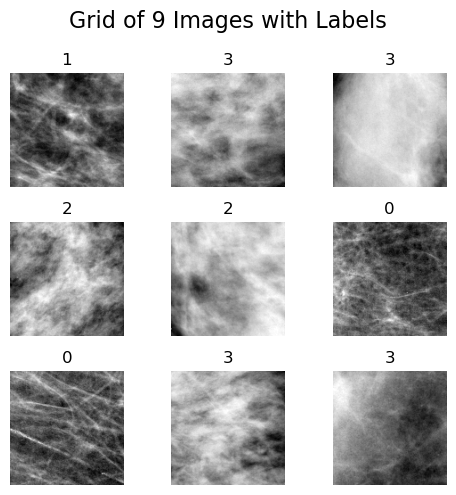

In [5]:
from src.utils.visualization import sample_images

sample_images(dataloader)

In [6]:
from src.models.encoder import Encoder
e = Encoder()

In [7]:
summary(e, input_size=(32, 1, 128, 128))

Layer (type:depth-idx)                   Output Shape              Param #
Encoder                                  [32, 32]                  --
├─Sequential: 1-1                        [32, 128, 14, 14]         --
│    └─Conv2d: 2-1                       [32, 32, 124, 124]        832
│    └─GELU: 2-2                         [32, 32, 124, 124]        --
│    └─MaxPool2d: 2-3                    [32, 32, 62, 62]          --
│    └─Conv2d: 2-4                       [32, 64, 60, 60]          18,496
│    └─GELU: 2-5                         [32, 64, 60, 60]          --
│    └─MaxPool2d: 2-6                    [32, 64, 30, 30]          --
│    └─Conv2d: 2-7                       [32, 128, 28, 28]         73,856
│    └─GELU: 2-8                         [32, 128, 28, 28]         --
│    └─MaxPool2d: 2-9                    [32, 128, 14, 14]         --
├─Flatten: 1-2                           [32, 25088]               --
├─Sequential: 1-3                        [32, 128]                 --
│    └

In [8]:
from src.models.decoder import Decoder
d = Decoder()

summary(d, input_size=(32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Decoder                                  [32, 1, 128, 128]         --
├─Sequential: 1-1                        [32, 25088]               --
│    └─Linear: 2-1                       [32, 128]                 4,224
│    └─GELU: 2-2                         [32, 128]                 --
│    └─Linear: 2-3                       [32, 256]                 33,024
│    └─GELU: 2-4                         [32, 256]                 --
│    └─Linear: 2-5                       [32, 25088]               6,447,616
│    └─GELU: 2-6                         [32, 25088]               --
├─Unflatten: 1-2                         [32, 128, 14, 14]         --
├─Sequential: 1-3                        [32, 32, 128, 128]        --
│    └─Upsample: 2-7                     [32, 128, 28, 28]         --
│    └─ConvTranspose2d: 2-8              [32, 128, 30, 30]         147,584
│    └─GELU: 2-9                         [32, 128, 30, 30]        

In [10]:
from src.models.vae import VAE
ae = VAE()

summary(ae, input_size=(32, 1, 128, 128))

Layer (type:depth-idx)                   Output Shape              Param #
VAE                                      [32, 1, 128, 128]         --
├─Encoder: 1-1                           [32, 32]                  --
│    └─Sequential: 2-1                   [32, 128, 14, 14]         --
│    │    └─Conv2d: 3-1                  [32, 32, 124, 124]        832
│    │    └─GELU: 3-2                    [32, 32, 124, 124]        --
│    │    └─MaxPool2d: 3-3               [32, 32, 62, 62]          --
│    │    └─Conv2d: 3-4                  [32, 64, 60, 60]          18,496
│    │    └─GELU: 3-5                    [32, 64, 60, 60]          --
│    │    └─MaxPool2d: 3-6               [32, 64, 30, 30]          --
│    │    └─Conv2d: 3-7                  [32, 128, 28, 28]         73,856
│    │    └─GELU: 3-8                    [32, 128, 28, 28]         --
│    │    └─MaxPool2d: 3-9               [32, 128, 14, 14]         --
│    └─Flatten: 2-2                      [32, 25088]               --
│    └